 #  Project:1 Identifying and Recommending Best Restaurants

1. importing necessary libraries 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis,skew

2.  collecting Data source as data frame

In [24]:
df = pd.read_excel('C:/Users/PRATHIPA/Desktop/DA Capstone Projects/Project capstone-1/data.xlsx')

1. Data Preliminary analysis:
 * Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.
 * Based on the findings from the previous questions identify duplicates and remove them.

3. Finding structure of the data

In [25]:

np.shape(df)

(9551, 19)

* Structure of the data frame is 
    1. Number of Columns: 19
    2. Number of Rows: 9551

4.  Finding missing vales and remove them

In [26]:
df.dropna(inplace=True)
np.shape(df)

(9541, 19)

* After dropping NAs we get 9541 number of rows. so it means that we had 10 rows of missing values

5. finding duplicates record and remove them

In [27]:
df.drop_duplicates()
np.shape(df)

(9541, 19)

* No duplicate records found

# Performing EDA:


1. 
Explore the geographical distribution of the restaurants and identify the cities with the 
maximum and minimum number of restaurants



In [28]:
# city with minimum number of restaurants
res_count = df.groupby('City')['City'].count()
city, count=res_count.idxmin(), res_count.min()
print(city, count)

Armidale 1


In [29]:
# city with maximum number of restaurants
res_count = df.groupby('City')['City'].count()
city, count=res_count.idxmax(), res_count.max()
print(city, count)

New Delhi 5473


In [30]:
country_df = pd.read_excel('C:/Users/PRATHIPA/Desktop/DA Capstone Projects/Project capstone-1/Country-Code.xlsx')
country_df
df1 = df.merge(country_df, how='inner', on=['Country Code'])
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,17582627,Senor Iguanas,216,Pocatello,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.443300,42.894200,Mexican,0,Dollar($),No,No,1,3.6,Yellow,Good,108,United States
9537,16654702,Lake House Restaurant,37,Vineland Station,"3100 N Service Rd, Vineland Station, ON L0R2E0",Vineland Station,"Vineland Station, Vineland Station",-79.379147,43.186870,"Italian, Mediterranean, Pizza",70,Dollar($),No,No,4,4.3,Green,Very Good,204,Canada
9538,16659169,Tokyo Sushi,37,Chatham-Kent,"150 Richmond St, Chatham-Kent, ON N7M2V2",Chatham-Kent,"Chatham-Kent, Chatham-Kent",-82.188438,42.397683,"Japanese, Sushi",25,Dollar($),No,No,2,3.7,Yellow,Good,176,Canada
9539,16643459,Consort Restaurant,37,Consort,"4931 50th Street, Consort, AB T0C 1B0",Consort,"Consort, Consort",-110.774699,52.008289,"Chinese, Canadian",25,Dollar($),No,No,2,3.0,Orange,Average,6,Canada


In [31]:
# Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence
res_count=df1.groupby('Country')['Country'].count()
res_count
country=res_count.idxmax()
print(country)


India


In [32]:
# Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking
ratio = df['Has Table booking'].value_counts(normalize=True).mul(100).round(decimals=0)
print(ratio)

No     88.0
Yes    12.0
Name: Has Table booking, dtype: float64


In [33]:
# Find out the percentage of restaurants providing online delivery
delivery_per = df['Has Online delivery'].value_counts(normalize= True).mul(100)['Yes'].round(decimals=1)
delivery_per


25.7

In [34]:
# Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver
yes_count = df[df['Has Online delivery']=='Yes']['Votes'].sum()
No_count = df['Votes'][df['Has Online delivery']=='No'].sum()
diff =  yes_count - No_count
abs(diff)

459322

In [35]:
df['Cuisines']=df['Cuisines'].str.split(",",n=-1,expand = False)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"[Italian, Continental]",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"[Asian, Indonesian, Western]",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"[Sushi, Japanese]",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,[Japanese],450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"[French, Western]",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"[Chinese, North Indian, Fast Food]",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"[Indian, Chinese, Continental]",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"[Cafe, Continental, Desserts, Ice Cream, I...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,[Street Food],0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78


In [36]:
# Number of cuisines in each restaurant
df['Cuisines Count'] = df['Cuisines'].str.len()
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines Count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"[Italian, Continental]",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"[Asian, Indonesian, Western]",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,3
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"[Sushi, Japanese]",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,2
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,[Japanese],450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,1
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"[French, Western]",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"[Chinese, North Indian, Fast Food]",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,3
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"[Indian, Chinese, Continental]",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,3
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"[Cafe, Continental, Desserts, Ice Cream, I...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,6
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,[Street Food],0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,1


In [37]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines Count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"[Italian, Continental]",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"[Asian, Indonesian, Western]",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,3
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"[Sushi, Japanese]",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,2
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,[Japanese],450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,1
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"[French, Western]",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"[Chinese, North Indian, Fast Food]",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,3
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"[Indian, Chinese, Continental]",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,3
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"[Cafe, Continental, Desserts, Ice Cream, I...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,6
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,[Street Food],0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,1


In [38]:
cuisines = df[['Restaurant ID','Cuisines','City']].copy()
cuisines

,Restaurant ID,Cuisines,City
0,7402935,"[Italian, Continental]",Jakarta
1,7410290,"[Asian, Indonesian, Western]",Jakarta
2,7420899,"[Sushi, Japanese]",Jakarta
3,7421967,[Japanese],Jakarta
4,7422489,"[French, Western]",Jakarta
...,...,...,...
9546,18279289,"[Chinese, North Indian, Fast Food]",Dehradun
9547,2300497,"[Indian, Chinese, Continental]",Kanpur
9548,18312106,"[Cafe, Continental, Desserts, Ice Cream, I...",Kanpur
9549,3900245,[Street Food],Varanasi


In [40]:
# explode
cuisines=cuisines.explode('Cuisines')
cuisines1 = cuisines
cuisines1

,Restaurant ID,Cuisines,City
0,7402935,Italian,Jakarta
0,7402935,Continental,Jakarta
1,7410290,Asian,Jakarta
1,7410290,Indonesian,Jakarta
1,7410290,Western,Jakarta
...,...,...,...
9548,18312106,Italian,Kanpur
9548,18312106,Beverages,Kanpur
9549,3900245,Street Food,Varanasi
9550,18246202,Chinese,Varanasi


In [41]:
# Remove spaces heading and trailing unnecessary spaces
cuisines['Cuisines']=cuisines['Cuisines'].str.strip()
cuisines['Cuisines']

0            Italian
0        Continental
1              Asian
1         Indonesian
1            Western
            ...     
9548         Italian
9548       Beverages
9549     Street Food
9550         Chinese
9550    North Indian
Name: Cuisines, Length: 19706, dtype: object

In [42]:
# group by and get the count and get the top 10 
cuisines_count=cuisines.groupby('Cuisines')['Cuisines'].count().sort_values(ascending=False)
cuisines_count
cuisines_count.head(10)


Cuisines
North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: Cuisines, dtype: int64

In [43]:
# Miimum and maximum number of cuisines served across the cities
min_served_cuisines = cuisines_count.where (cuisines_count==cuisines_count.min())
min_served_cuisines.dropna(inplace=True)
min_served_cuisines

Cuisines
Canadian             1.0
Fish and Chips       1.0
Irish                1.0
Peranakan            1.0
Gourmet Fast Food    1.0
Malay                1.0
Cuisine Varies       1.0
DÌ_ner               1.0
Soul Food            1.0
Bubble Tea           1.0
Malwani              1.0
Mineira              1.0
BÌ_rek               1.0
Peruvian             1.0
Durban               1.0
Name: Cuisines, dtype: float64

In [44]:
# maximum served cuisines
max_served_cuisines = cuisines_count.where (cuisines_count==cuisines_count.max())
max_served_cuisines.dropna(inplace=True)
max_served_cuisines


Cuisines
North Indian    3959.0
Name: Cuisines, dtype: float64

In [45]:
# most served cuisine across each city
grouped = cuisines.groupby(['City','Cuisines']).count().reset_index()
grouped['count']=grouped['Restaurant ID'].copy()
grouped.drop(['Restaurant ID'],axis=1, inplace=True)
most_served_cuisine = grouped.sort_values('count',ascending=False) 
most_served_cuisine=most_served_cuisine.drop_duplicates('City')
most_served_cuisine


,City,Cuisines,count
1217,New Delhi,North Indian,2425
1274,Noida,North Indian,532
753,Gurgaon,North Indian,508
646,Faridabad,North Indian,122
1491,Ranchi,North Indian,16
...,...,...,...
1085,Mohali,Continental,1
1087,Monroe,Italian,1
1089,Montville,Coffee and Tea,1
547,Dicky Beach,Tea,1


Kurtosis:  1493.4306282055497
Skewness: 35.45382649048128


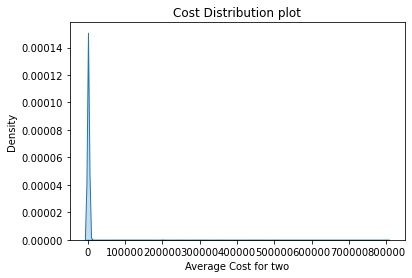

In [46]:
# What is the distribution cost across the restaurants? 

sns.kdeplot(df['Average Cost for two'],shade=True)
plt.title("Cost Distribution plot");
print('Kurtosis: ',kurtosis(df['Average Cost for two']))
print('Skewness:',skew(df['Average Cost for two']))

# Conclusion:
1. Average cost for two is not equally distributed.
2. The distribution with a higher kurtosis has a heavier tail.
3. skewness value Greater than zero means that there is more weight in the left tail of the distribution.

Kurtosis:  -0.5854158785261716
Skewness: -0.9527777600778069


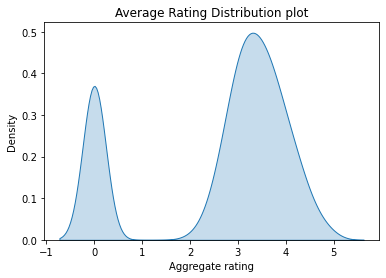

In [47]:
# How ratings are distributed among the various factors?
sns.kdeplot(df['Aggregate rating'], shade=True)
plt.title('Average Rating Distribution plot');
print('Kurtosis: ',kurtosis(df['Aggregate rating']))
print('Skewness:',skew(df['Aggregate rating']))

# Conclusion
1. For normally distributed data, the skewness should be about zero. 
2. skewness value lesser than zero means that there is more weight in the left tail of the distribution. 
3. The kurtosis of the normal distribution is zero.  Average rating kurtosis is close to zero.

[[1.         0.25019371]
 [0.25019371 1.        ]]


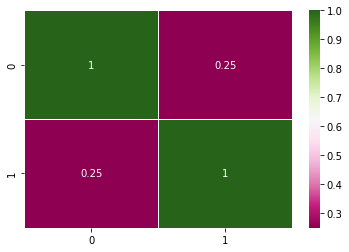

In [48]:
# Explain the factors in the data that may have an effect on ratings. 
# For example, number of cuisines, cost, delivery option, etc.
# Correlation between number of cuisines and rantings

corr_matrix = np.corrcoef(df['Aggregate rating'],df['Cuisines Count'])
print(corr_matrix)
sns.heatmap(corr_matrix,cmap="PiYG",annot=True,linewidths=.5);

# R value is 0.19.
* Therefore we can conclude Number of cuisines has No linear relationship with respect to the ratings of the restaurants.

[[1.         0.05186896]
 [0.05186896 1.        ]]


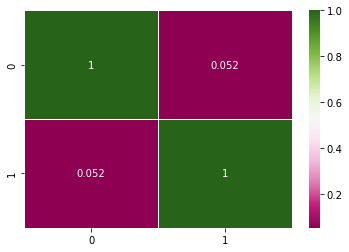

In [27]:
# correlation between cost and the ratings

corr_matrix = np.corrcoef(df['Aggregate rating'],df['Average Cost for two'])
print(corr_matrix)
sns.heatmap(corr_matrix,cmap="PiYG",annot=True,linewidths=.5);

# R value is 0.052.
* Therefore we can conclude cost has No linear relationship with respect to the ratings of the restaurants.

In [28]:


# correlation between delivery option and the ratings
df['Aggregate rating'].corr(df['Has Online delivery'],method='spearman')


0.16617590187137596

# R value is 0.16.
* R value is less than 0.30, Therefore we can conclude Online Delivery option has No linear relationship with respect to the ratings of the restaurants.

In [29]:
# correlation between Table booking and the ratings
df['Aggregate rating'].corr(df['Has Table booking'],method='spearman')


0.20339401634519882

# R value is 0.20.
* R value is less than 0.30, Therefore we can conclude Table Booking option has No linear relationship with respect to the ratings of the restaurants.

# Conclusion
* None of the factors like (Average cost, Delivery Option, Table booking, Number of cuisines) has effect on ratings of the restaurants.

In [36]:
# to save cleaned data frame into an excel file
df.to_excel('C:/Users/PRATHIPA/Desktop/DA Capstone Projects/Project capstone-1/restaurant.xlsx',index=False)

In [49]:
with pd.ExcelWriter('C:/Users/PRATHIPA/Desktop/DA Capstone Projects/Project capstone-1/file.xlsx') as writer:
    df.to_excel(writer, sheet_name='zomato')
    cuisines1.to_excel(writer, sheet_name='cuisines')